### *Extrovert vs. Introvert Personality Traits Dataset, a rich collection of behavioral and social data designed to explore the spectrum of human personality. This dataset captures key indicators of extroversion and introversion, making it a valuable resource for psychologists, data scientists, and researchers studying social behavior, personality prediction, or data preprocessing techniques.*

* The domain knowledge provided in the kaggle source:
  
  - Time_spent_Alone: Hours spent alone daily (0–11).
  
  - Stage_fear: Presence of stage fright (Yes/No).
    
  - Social_event_attendance: Frequency of social events (0–10).
    
  - Going_outside: Frequency of going outside (0–7).
    
  - Drained_after_socializing: Feeling drained after socializing (Yes/No).
    
  - Friends_circle_size: Number of close friends (0–15).
    
  - Post_frequency: Social media post frequency (0–10).
     
  - Personality: Target variable (Extrovert/Introvert).*


In [45]:
import pandas as pd

In [46]:
df = pd.read_csv("D:\personality_dataset.csv")

In [47]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [48]:
df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2837.000000,2838.000000,2834.000000,2823.000000,2835.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.479192,2.903827,2.247327,4.289693,2.926582
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.000000,3.000000,5.000000,3.000000
75%,8.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


#### ensured the data description corresponds to the domain knowledge 

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [50]:
df.shape

(2900, 8)

In [51]:
df.isnull().sum()

Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64

### Before Imputing, we have to encode the categorical columns first

In [52]:
df.columns

Index(['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency', 'Personality'],
      dtype='object')

In [53]:
print(f"stage fear values : {df['Stage_fear'].value_counts()} \n drained after socializing values : {df['Drained_after_socializing'].value_counts()}")

stage fear values : Stage_fear
No     1417
Yes    1410
Name: count, dtype: int64 
 drained after socializing values : Drained_after_socializing
No     1441
Yes    1407
Name: count, dtype: int64


In [54]:
stageFear = {
    'No':0,
    'Yes':1
}
df['Stage_fear'] = df['Stage_fear'].map(stageFear)

drainedAfterSocializing={
    'No':0,
    'Yes':1
}
df['Drained_after_socializing'] = df['Drained_after_socializing'].map(drainedAfterSocializing)

personality = {
    'Introvert': 1,
    'Extrovert': 0
}
df['Personality'] = df['Personality'].map(personality)

In [55]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0.0,4.0,6.0,0.0,13.0,5.0,0
1,9.0,1.0,0.0,0.0,1.0,0.0,3.0,1
2,9.0,1.0,1.0,2.0,1.0,5.0,2.0,1
3,0.0,0.0,6.0,7.0,0.0,14.0,8.0,0
4,3.0,0.0,9.0,4.0,0.0,8.0,5.0,0


### Now we can impute the nulls

In [56]:
for feature in df.columns[:-1]:
    df[feature].fillna(df[feature].mode()[0],inplace = True)

C:\Users\CompuFast\AppData\Local\Temp\ipykernel_1328\4332822.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[feature].fillna(df[feature].mode()[0],inplace = True)


In [57]:
df.isnull().sum()

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

In [58]:
for feature in df.columns[:-1]:
    print(df[feature].duplicated().sum())

2888
2898
2889
2892
2898
2884
2889


### it is normal to see duplicates here as the ranges are so tight and removing them will affect the model badly


In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data Visualization

In [60]:
df['Personality'].value_counts()

Personality
0    1491
1    1409
Name: count, dtype: int64

Text(0.5, 1.0, 'Personality Distribution')

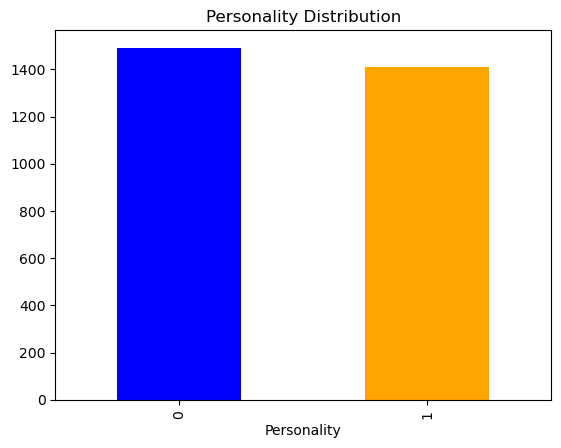

In [61]:
df['Personality'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Personality Distribution')

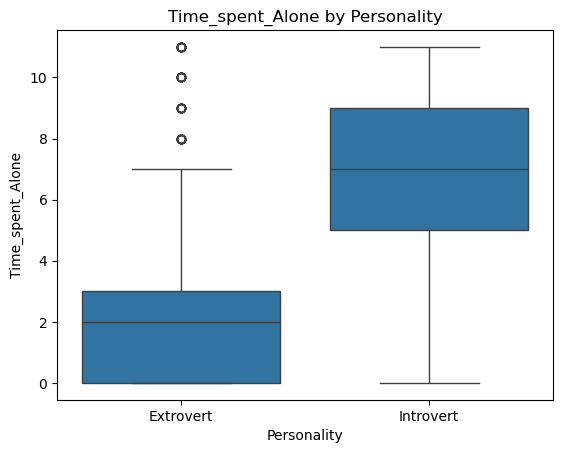

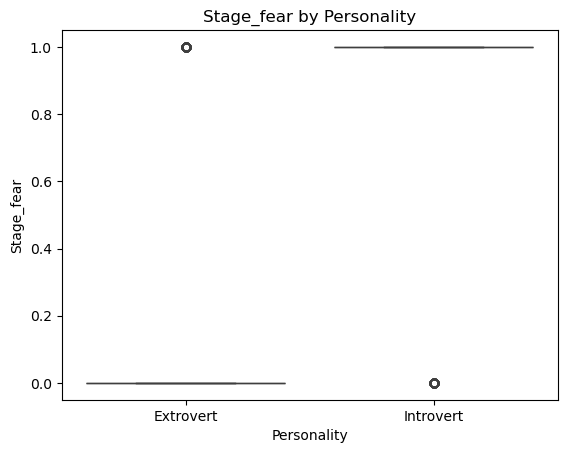

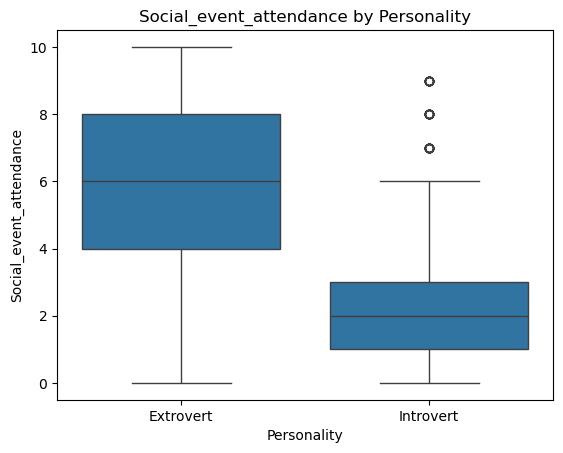

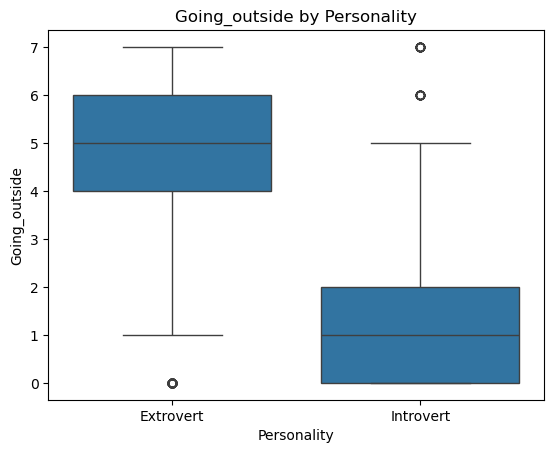

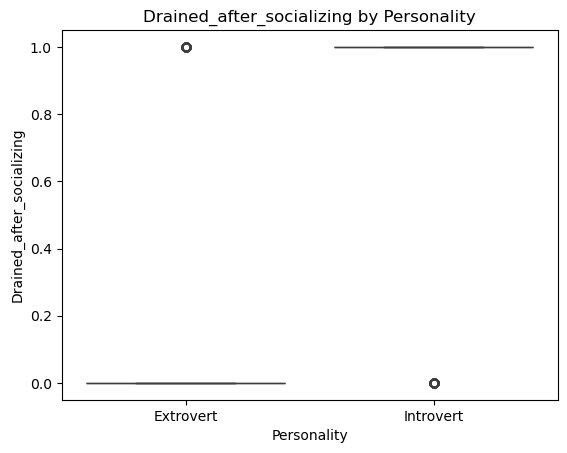

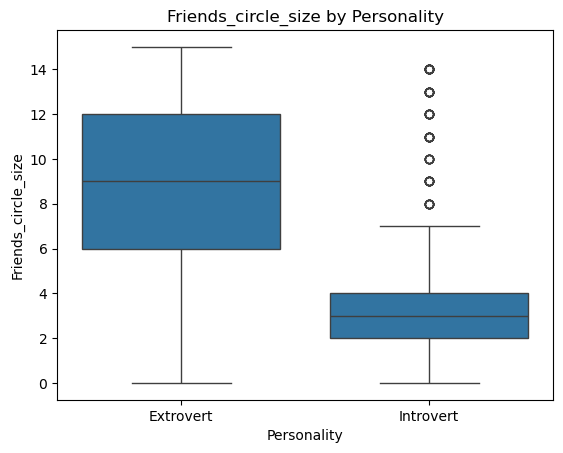

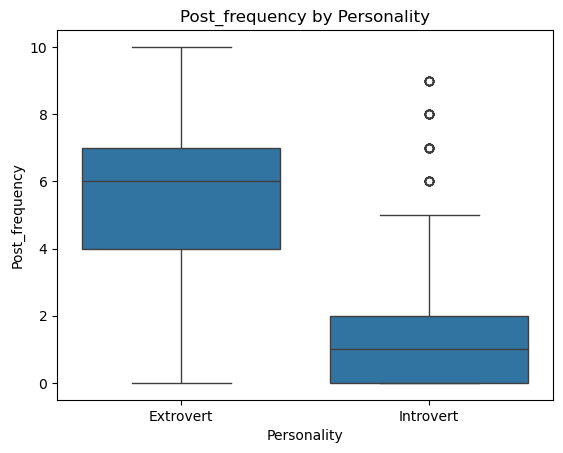

In [62]:
features = df.columns[:-1]  
for feature in features:
    sns.boxplot(data=df, x='Personality', y=feature)
    plt.xticks([0, 1], ['Extrovert', 'Introvert'])
    plt.title(f'{feature} by Personality')
    plt.show()


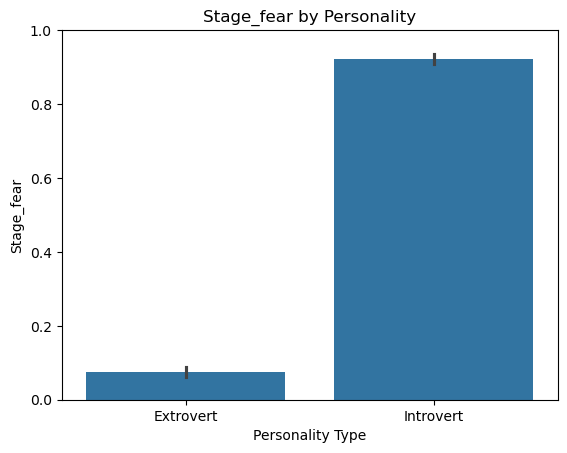

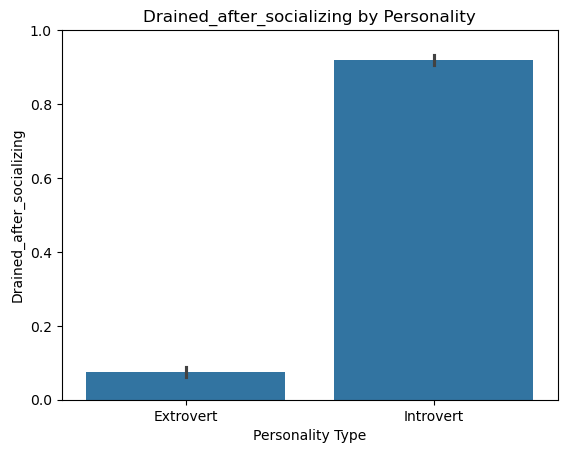

In [63]:
binary_features = ['Stage_fear', 'Drained_after_socializing']
for feature in binary_features:
    sns.barplot(x='Personality', y=feature, data=df)
    plt.xticks([0, 1], ['Extrovert', 'Introvert'])
    plt.xlabel('Personality Type')
    plt.title(f'{feature} by Personality')
    plt.ylim(0, 1)
    plt.show()


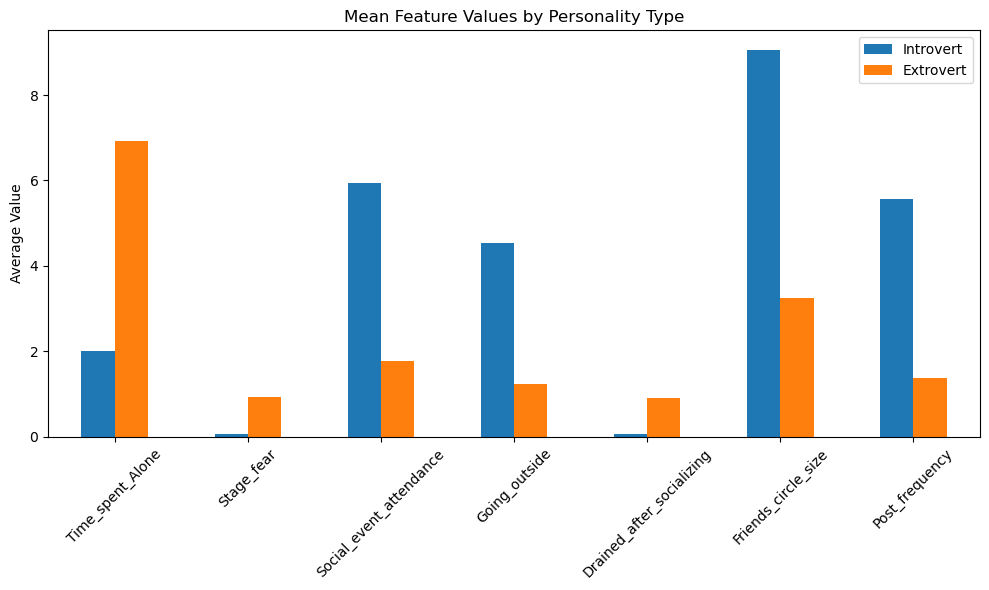

In [64]:
df_grouped = df.groupby('Personality').mean().T
df_grouped.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Feature Values by Personality Type')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.legend(['Introvert', 'Extrovert'], loc='upper right')
plt.tight_layout()
plt.show()



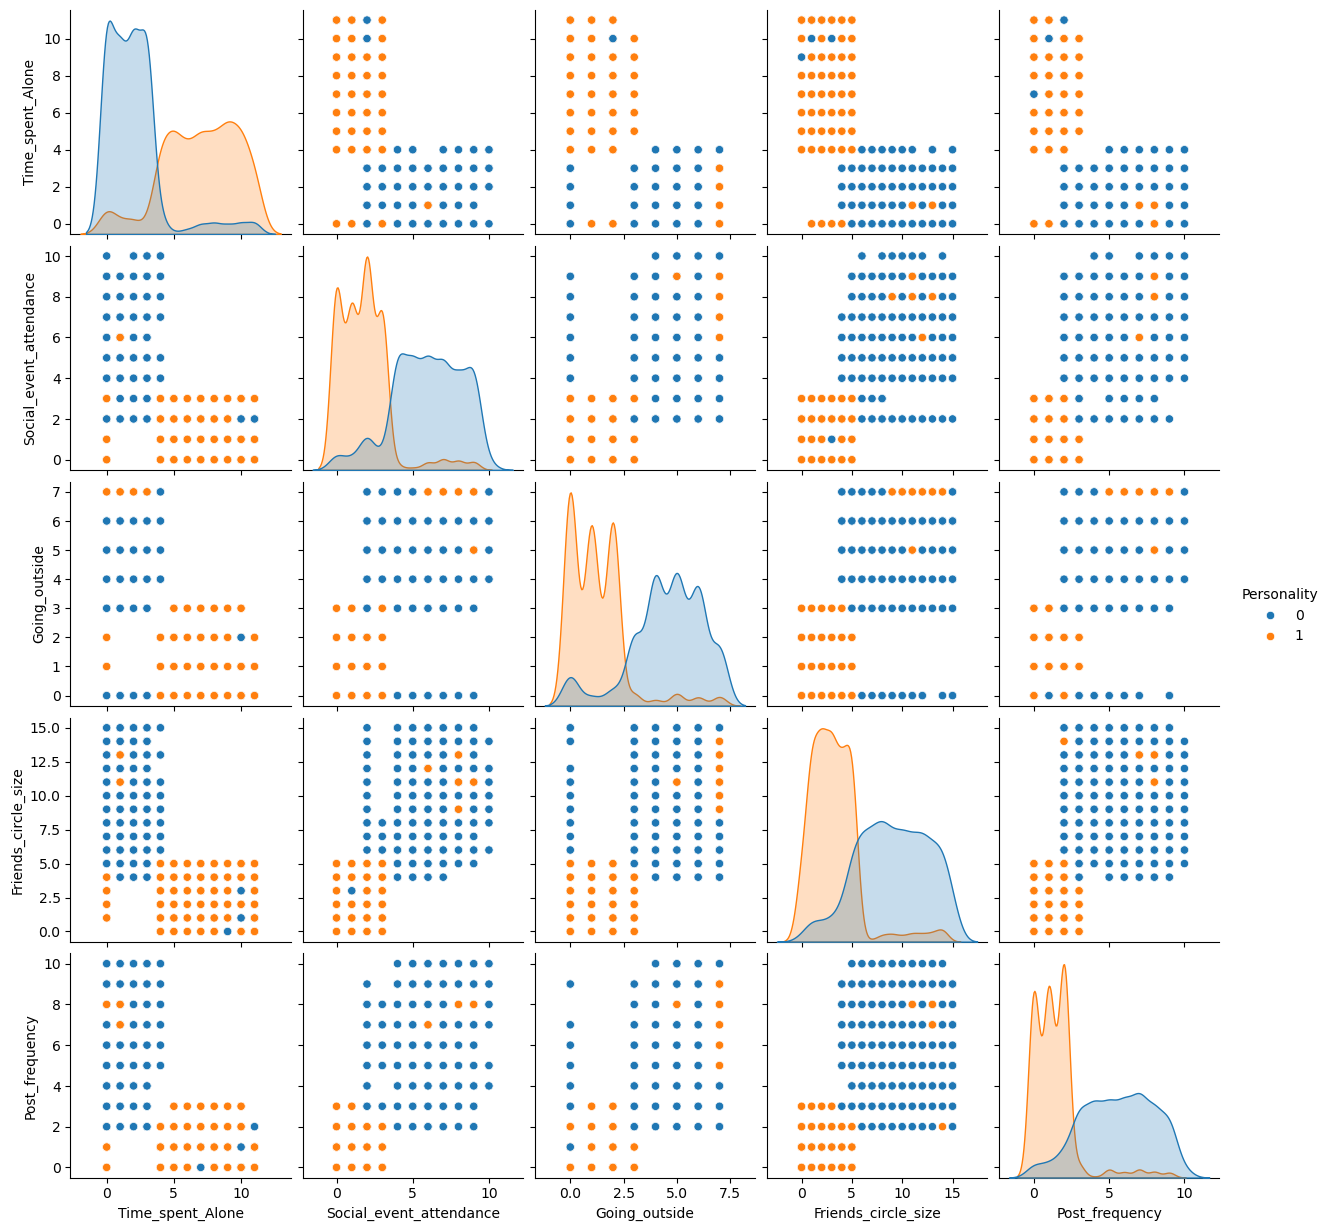

In [65]:
sns.pairplot(df, hue='Personality', diag_kind='kde', 
             vars=['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency'])
plt.show()


## Classification Model: Logistic Regression

In [66]:
# splitting
from sklearn.model_selection import train_test_split

In [67]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Personality', axis=1), df['Personality'], test_size=0.2, random_state=42) 

In [68]:
print(x_train.shape[0], x_test.shape[0], y_train.shape[0], y_test.shape[0])

2320 580 2320 580


In [69]:
x_train.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
2078,3.0,0.0,5.0,6.0,0.0,10.0,9.0
163,6.0,1.0,3.0,3.0,1.0,1.0,0.0
1938,10.0,1.0,2.0,2.0,1.0,1.0,0.0
252,9.0,1.0,1.0,2.0,1.0,3.0,1.0
2232,10.0,1.0,0.0,0.0,1.0,4.0,1.0


### Scaling: Here we are going to scale the numerical columns in the train and test data as the categorical columns are already scaled (0 and 1)

In [70]:
numerical_features = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']

train_mean = x_train[numerical_features].mean()
train_std = x_train[numerical_features].std() 

x_train[numerical_features] = (x_train[numerical_features] - train_mean) / train_std
x_test[numerical_features] = (x_test[numerical_features] - train_mean) / train_std


In [167]:
print(train_mean,train_std)

Time_spent_Alone           4.411638
Social_event_attendance    3.914224
Going_outside              2.934483
Friends_circle_size        6.214224
Post_frequency             3.529310
dtype: float64 Time_spent_Alone           3.499885
Social_event_attendance    2.887269
Going_outside              2.267003
Friends_circle_size        4.227496
Post_frequency             2.907071
dtype: float64


#### checking if the scaling process is successful

In [72]:
x_train.describe()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
count,2.320000e+03,2320.000000,2.320000e+03,2.320000e+03,2320.000000,2.320000e+03,2.320000e+03
mean,-9.034918e-17,0.486207,-2.143879e-17,-6.431637e-17,0.486207,4.900295e-17,2.450147e-17
std,1.000000e+00,0.499917,1.000000e+00,1.000000e+00,0.499917,1.000000e+00,1.000000e+00
min,-1.260509e+00,0.000000,-1.355684e+00,-1.294433e+00,0.000000,-1.469954e+00,-1.214044e+00
25%,-9.747857e-01,0.000000,-6.629878e-01,-8.533217e-01,0.000000,-7.603139e-01,-8.700547e-01
50%,-4.033384e-01,0.000000,-3.166398e-01,-4.122107e-01,0.000000,-2.872206e-01,-3.540713e-01
75%,7.395563e-01,1.000000,7.224044e-01,9.111225e-01,1.000000,8.955125e-01,8.498898e-01
max,1.882451e+00,1.000000,2.107797e+00,1.793345e+00,1.000000,2.078246e+00,2.225845e+00


In [ ]:
import numpy as np
import math


## Logistic Regression Phase:

In [111]:
def sigmoid(z):
    z = np.clip(z, -500, 500)  # prevent overflow
    return 1 / (1 + np.exp(-z))

I encountered an issue here where G(z) resulted in nan values which means it had results which are equal to exactly 0 or 1
0 : log(0) = undefined
1 : log(1-1) = 0 , which is undefined again

* solution:
  
    * clipping the result so if it zero we make it so close to zero and same thing to the one

In [145]:
x_train_np = x_train.to_numpy()
y_train_np = y_train.to_numpy()
x_test_np = x_test.to_numpy()
y_test_np = y_test.to_numpy()

In [113]:
def compute_cost(x,y,w,b):

    m,n = x_train.shape # m = no. of samples , n = no. of features
    cost = 0
    for i in range(m):
        z = np.dot(w,x[i]) + b
        f_wb = sigmoid(z)
        f_wb = np.clip(f_wb, 1e-10, 1 - 1e-10)
        loss = -y[i] * np.log(f_wb) - (1 - y[i]) * np.log(1 - f_wb)
        cost = cost + loss
    total_cost = cost/m
    return total_cost

In [114]:
np.random.seed(42)   

w_tmp = np.random.randn(7) 
b_tmp = np.random.randn(1)  

print(compute_cost(x_train_np, y_train_np, w_tmp, b_tmp))

[2.68994063]


In [115]:
def compute_gradients(x, y, w, b):
    m, n = x.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):
        z = np.dot(w, x[i]) + b
        f_wb = sigmoid(z)
        err = f_wb - y[i]
        dj_dw += err * x[i] 
        dj_db += err

    dj_dw /= m
    dj_db /= m

    return dj_dw, dj_db


In [116]:
dj_dw_tmp,dj_db_tmp = compute_gradients(x_train_np, y_train_np, w_tmp, b_tmp)
print(f"dj_db: {dj_db_tmp}" )
print(f"dj_dw: {dj_dw_tmp.tolist()}" )

dj_db: [0.03767041]
dj_dw: [-0.6668976643733409, -0.3858447043110752, 0.7057420153701975, 0.7376001565899092, -0.3861104693534721, 0.6594189001930938, 0.7244530721474988]


In [117]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters):  
    J_history = []
    w = w_in.copy()
    b = b_in

    for i in range(num_iters):
        # Correct unpacking
        dj_dw, dj_db = compute_gradients(X, y, w, b)   

        # Update  
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               

        if i < 100000: 
            J_history.append(compute_cost(X, y, w, b))

        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}")

    return w, b, J_history


In [161]:
w_out, b_out,J_history= gradient_descent(x_train_np, y_train_np, w_tmp, b_tmp, 0.1, 15000) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

Iteration    0: Cost [2.41997082]
Iteration 1500: Cost [0.26565175]
Iteration 3000: Cost [0.2572194]
Iteration 4500: Cost [0.25399689]
Iteration 6000: Cost [0.25273677]
Iteration 7500: Cost [0.25223149]
Iteration 9000: Cost [0.25202462]
Iteration 10500: Cost [0.25193862]
Iteration 12000: Cost [0.25190248]
Iteration 13500: Cost [0.25188718]

updated parameters: w:[-0.19966054  2.72463194 -0.10268911 -0.09067955  2.68822539  0.30885741
 -0.26574027], b:[-2.72522646]


## Training accuracy

In [162]:
def accuracy(x, y, w, b):
    m = x.shape[0]
    P = []
    for i in range(m):
        pred = sigmoid(np.dot(w, x[i]) + b)
        if pred >= 0.5:
            P.append(1)
        else:
            P.append(0)
    P = np.array(P)  # convert list to numpy array
    acc = ((P == y).sum() / len(y)) * 100
    return f"Accuracy = {acc:.2f} %"


In [163]:
accuracy(x_train_np,y_train,w_out,b_out)

'Accuracy = 92.33 %'

In [164]:
accuracy(x_test_np,y_test_np,w_out,b_out)

'Accuracy = 91.90 %'